2)Implement a decorator that log the execution time of a function

In [5]:
import time

def execution_time_logger(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time of {func.__name__}: {end_time - start_time} seconds")
        return result
    return wrapper

@execution_time_logger
def example_function():
    # Your function's code here
    time.sleep(2)  # Simulating some work that takes 2 seconds

example_function()


Execution time of example_function: 2.0140535831451416 seconds


We can see that the decorator does work was taken into account as the time execution considers the simulated task.

3. Download Shakespear artwork (
https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt )


In [6]:
import requests

url = 'https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt'
response = requests.get(url)
text = response.text

with open('shakespeare.txt', 'wb') as file:
    file.write(response.content)


Create 2 functions that count the number of appearances of each word in this text:
a. using a dictionary
b. using the Counter function ( https://realpython.com/python-counter/ )


In [7]:
# Using a dictionary
@execution_time_logger
def word_count_dictionary(text):
    words = text.split()
    word_count = {}
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

# Using Counter function
from collections import Counter
@execution_time_logger
def word_count_counter(text):
    words = text.split()
    return Counter(words)


What is the time taken for both implementations for this task? Why is it different?
What are the specificities of the underlying data structures (especially the
dictionary)?

In [8]:
word_count_dictionary(text)
word_count_counter(text)

Execution time of word_count_dictionary: 0.4759976863861084 seconds
Execution time of word_count_counter: 0.36200475692749023 seconds


Counter({'This': 1105,
         'is': 7851,
         'the': 23242,
         '100th': 1,
         'Etext': 4,
         'file': 14,
         'presented': 11,
         'by': 2824,
         'Project': 13,
         'Gutenberg,': 1,
         'and': 18297,
         'in': 9576,
         'cooperation': 1,
         'with': 6722,
         'World': 5,
         'Library,': 2,
         'Inc.,': 1,
         'from': 2283,
         'their': 1934,
         'Library': 4,
         'of': 15544,
         'Future': 3,
         'Shakespeare': 45,
         'CDROMS.': 1,
         'Gutenberg': 11,
         'often': 116,
         'releases': 1,
         'Etexts': 3,
         'that': 7531,
         'are': 2917,
         'NOT': 225,
         'placed': 10,
         'Public': 1,
         'Domain!!': 1,
         '*This': 1,
         'has': 326,
         'certain': 116,
         'copyright': 7,
         'implications': 1,
         'you': 9081,
         'should': 1387,
         'read!*': 1,
         '<<THIS': 220,
     

The word_count_dictionary implementation took approximately 0.476 seconds, while the word_count_counter implementation took approximately 0.362 seconds.

In the word_count_dictionary implementation, the dictionary is manually managed, requiring explicit checks for the presence of each word. This process involves conditionals and explicit assignments, which can lead to slower execution, especially when dealing with large datasets.

Whereas, the Counter function internally manages the dictionary with built-in methods optimized for counting elements. It directly increments the counts for encountered elements. 

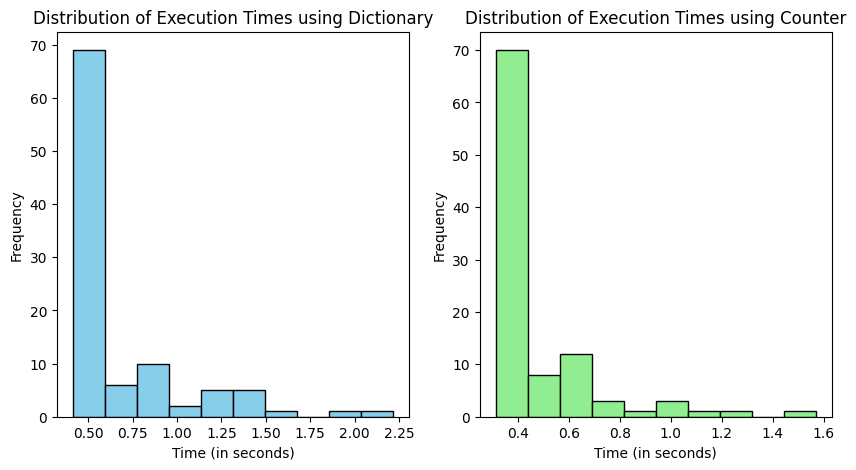

In [5]:
import time
from collections import Counter
import matplotlib.pyplot as plt



execution_times_dict = []
execution_times_counter = []

for _ in range(100):
    # Run the experiment and measure time for dictionary method
    start_time_dict = time.time()
    word_count_dictionary(text)
    end_time_dict = time.time()
    execution_times_dict.append(end_time_dict - start_time_dict)

    # Run the experiment and measure time for Counter method
    start_time_counter = time.time()
    word_count_counter(text)
    end_time_counter = time.time()
    execution_times_counter.append(end_time_counter - start_time_counter)

# Plotting the distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(execution_times_dict, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Execution Times using Dictionary')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(execution_times_counter, bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Execution Times using Counter')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')

plt.show()



The plotted graphs indicate significant distinctions between the distribution patterns of execution times for the two methods. The first graph, representing the utilization of the dictionary, illustrates a greater concentration of occurrences around 0.5 seconds, with a noticeable secondary peak approximately at 0.8 seconds. Moreover, there is evidence suggesting that certain executions take longer, surpassing  2 seconds.

In contrast, the second graph, illustrating the implementation of the Counter function, exhibits a more prominent concentration of instances around 0.4 seconds, accompanied by a discernible secondary peak close to 0.6 seconds. Instances of longer execution times appear to be less frequent not overpass 1.5 seconds.

These findings shows that Counter function has execution times shorter than the other function.